In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# load the logs table data into a pandas dataframe
df = pd.read_csv('logs.csv')

In [3]:
# replace missing values in the 'priority' column with a default value of 0
df['priority'] = df['priority'].fillna(0)

In [4]:
# convert the 'priority' column into a categorical variable with three classes
df['priority'] = pd.cut(df['priority'], bins=[-float('inf'), 2, 5, float('inf')], labels=['low', 'medium', 'high'])


In [5]:
# select the columns to use for the model
columns = ['job', 'project', 'type', 'origin', 'message', 'priority']

In [6]:
# create a new dataframe with only the selected columns
data = df[columns]

In [7]:
# encode the categorical variables as numerical features
data_enc = pd.get_dummies(data.drop('priority', axis=1))

In [8]:
# split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data_enc, data['priority'], test_size=0.2)


In [9]:
# create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# fit the classifier to the training data
rf.fit(train_data, train_target)

RandomForestClassifier(random_state=42)

In [11]:
# make predictions on the test data
predictions = rf.predict(test_data)


In [12]:
# evaluate the performance of the model
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       622
         low       1.00      1.00      1.00      9332
      medium       1.00      1.00      1.00     16117

    accuracy                           1.00     26071
   macro avg       1.00      1.00      1.00     26071
weighted avg       1.00      1.00      1.00     26071



In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the logs table data into a pandas dataframe
df = pd.read_csv('logs.csv')


In [2]:
# Replace missing values in the 'priority' column with a default value of 0
df['priority'] = df['priority'].fillna(0)

# Convert the 'priority' column into a categorical variable with three classes
df['priority'] = pd.cut(df['priority'], bins=[-float('inf'), 2, 5, float('inf')], labels=[0, 1, 2])

In [3]:
# Select the columns to use for the model
columns = ['job', 'project', 'type', 'origin', 'message', 'priority']

# Create a new dataframe with only the selected columns
data = df[columns]

In [4]:
# Encode the categorical variables as numerical features
data_enc = pd.get_dummies(data.drop('priority', axis=1))


In [5]:

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data_enc, data['priority'], test_size=0.2)

In [6]:
# Create a Linear Regression model
lr = LinearRegression()

In [7]:
# Fit the model to the training data
lr.fit(train_data, train_target)


LinearRegression()

In [8]:
# Make predictions on the test data
predictions = lr.predict(test_data)

In [9]:
# Convert the continuous predictions to classes
predictions_classes = pd.cut(predictions, bins=[-float('inf'), 0.5, 1.5, float('inf')], labels=[0, 1, 2])


In [10]:
# Evaluate the performance of the model
print(classification_report(test_target, predictions_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9317
           1       1.00      1.00      1.00     16137
           2       1.00      0.99      0.99       617

    accuracy                           1.00     26071
   macro avg       1.00      1.00      1.00     26071
weighted avg       1.00      1.00      1.00     26071



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Load the logs table data into a pandas dataframe
df = pd.read_csv('logs.csv')

In [12]:
# Replace missing values in the 'priority' column with a default value of 0
df['priority'] = df['priority'].fillna(0)

In [13]:
# Convert the 'priority' column into a categorical variable with three classes
df['priority'] = pd.cut(df['priority'], bins=[-float('inf'), 2, 5, float('inf')], labels=[0, 1, 2])


In [14]:
# Select the columns to use for the model
columns = ['job', 'project', 'type', 'origin', 'message', 'priority']

# Create a new dataframe with only the selected columns
data = df[columns]


In [15]:
# Encode the categorical variables as numerical features
data_enc = pd.get_dummies(data.drop('priority', axis=1))

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data_enc, data['priority'], test_size=0.2)


In [16]:
# Binarize the target variables for multi-class AUC calculation
train_target_bin = label_binarize(train_target, classes=[0, 1, 2])
test_target_bin = label_binarize(test_target, classes=[0, 1, 2])


In [17]:
# Create a RandomForestClassifier wrapped with OneVsRestClassifier
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))


In [18]:
# Fit the classifier to the training data
rf.fit(train_data, train_target_bin)


OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [19]:
# Make predictions on the test data using One-vs-Rest approach
rf_pred_prob = rf.predict_proba(test_data)


In [20]:
# Calculate AUC for RandomForestClassifier
rf_auc = roc_auc_score(test_target_bin, rf_pred_prob, multi_class='ovr')

In [21]:
# Create a LinearRegression model wrapped with OneVsRestClassifier
lr = OneVsRestClassifier(LinearRegression())

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Load the logs table data into a pandas dataframe
df = pd.read_csv('logs.csv')

# Replace missing values in the 'priority' column with a default value of 0
df['priority'] = df['priority'].fillna(0)

# Convert the 'priority' column into a categorical variable with three classes
df['priority'] = pd.cut(df['priority'], bins=[-float('inf'), 2, 5, float('inf')], labels=[0, 1, 2])

# Select the columns to use for the model
columns = ['job', 'project', 'type', 'origin', 'message', 'priority']

# Create a new dataframe with only the selected columns
data = df[columns]

# Encode the categorical variables as numerical features
data_enc = pd.get_dummies(data.drop('priority', axis=1))

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data_enc, data['priority'], test_size=0.2)

# Binarize the target variables for multi-class AUC calculation
train_target_bin = label_binarize(train_target, classes=[0, 1, 2])
test_target_bin = label_binarize(test_target, classes=[0, 1, 2])

# Create a RandomForestClassifier wrapped with OneVsRestClassifier
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the classifier to the training data
rf.fit(train_data, train_target_bin)

# Make predictions on the test data using One-vs-Rest approach
rf_pred_prob = rf.predict_proba(test_data)

# Calculate AUC for RandomForestClassifier
rf_auc = roc_auc_score(test_target_bin, rf_pred_prob, multi_class='ovr')

# Create a LinearRegression model wrapped with OneVsRestClassifier
lr = OneVsRestClassifier(LinearRegression())

# Fit the model to the training data
lr.fit(train_data, train_target_bin)

# Make predictions on the test data
lr_pred_prob = lr.predict(test_data)

# Calculate AUC for LinearRegression
lr_auc = roc_auc_score(test_target_bin, lr_pred_prob, multi_class='ovr')

# Print AUC scores
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Linear Regression AUC: {lr_auc:.4f}")


Random Forest AUC: 1.0000
Linear Regression AUC: 0.9982


               Model       AUC
0      Random Forest  1.000000
1  Linear Regression  0.997827


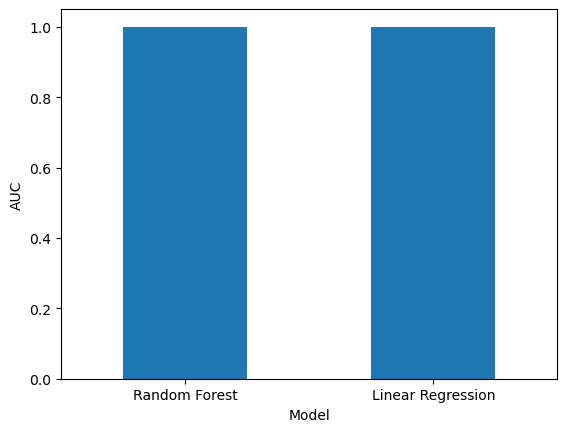

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Load the logs table data into a pandas dataframe
df = pd.read_csv('logs.csv')

# Replace missing values in the 'priority' column with a default value of 0
df['priority'] = df['priority'].fillna(0)

# Convert the 'priority' column into a categorical variable with three classes
df['priority'] = pd.cut(df['priority'], bins=[-float('inf'), 2, 5, float('inf')], labels=[0, 1, 2])

# Select the columns to use for the model
columns = ['job', 'project', 'type', 'origin', 'message', 'priority']

# Create a new dataframe with only the selected columns
data = df[columns]

# Encode the categorical variables as numerical features
data_enc = pd.get_dummies(data.drop('priority', axis=1))

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data_enc, data['priority'], test_size=0.2)

# Binarize the target variables for multi-class AUC calculation
train_target_bin = label_binarize(train_target, classes=[0, 1, 2])
test_target_bin = label_binarize(test_target, classes=[0, 1, 2])

# Create a RandomForestClassifier wrapped with OneVsRestClassifier
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the classifier to the training data
rf.fit(train_data, train_target_bin)

# Make predictions on the test data using One-vs-Rest approach
rf_pred_prob = rf.predict_proba(test_data)

# Calculate AUC for RandomForestClassifier
rf_auc = roc_auc_score(test_target_bin, rf_pred_prob, multi_class='ovr')

# Create a LinearRegression model wrapped with OneVsRestClassifier
lr = OneVsRestClassifier(LinearRegression())

# Fit the model to the training data
lr.fit(train_data, train_target_bin)

# Make predictions on the test data
lr_pred_prob = lr.predict(test_data)

# Calculate AUC for LinearRegression
lr_auc = roc_auc_score(test_target_bin, lr_pred_prob, multi_class='ovr')

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'AUC': [rf_auc, lr_auc]
})

# Print the results DataFrame
print(results)

# Plot the results as a bar plot
fig, ax = plt.subplots()
results.plot(x='Model', y='AUC', kind='bar', ax=ax, legend=False)
ax.set_ylabel('AUC')
plt.xticks(rotation=0)
plt.show()


In [1]:
!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Function to plot ROC curves
def plot_roc_curves(y_test, y_score, title, n_classes=3):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

# Load the logs table data into a pandas dataframe
df = pd.read_csv('logs.csv')

# Replace missing values in the 'priority' column with a default value of 0
df['priority'] = df['priority'].fillna(0)

# Convert the 'priority' column into a categorical variable with three classes
df['priority'] = pd.cut(df['priority'], bins=[-float('inf'), 2, 5, float('inf')], labels=[0, 1, 2])

# Select the columns to use for the model
columns = ['job', 'project', 'type', 'origin', 'message', 'priority']

# Create a new dataframe with only the selected columns
data = df[columns]

# Encode the categorical variables as numerical features
data_enc = pd.get_dummies(data.drop('priority', axis=1))

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data_enc, data['priority'], test_size=0.2)

# Binarize the target variables for multi-class AUC calculation
train_target_bin = label_binarize(train_target, classes=[0, 1, 2])
test_target_bin = label_binarize(test_target, classes=[0, 1, 2])

# Create a RandomForestClassifier wrapped with OneVsRestClassifier
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the classifier to the training data
rf.fit(train_data, train_target_bin)

# Make predictions on the test data using One-vs-Rest approach
rf_pred_prob = rf.predict_proba(test_data)

# Create a LinearRegression model wrapped with OneVsRestClassifier
lr = OneVsRestClassifier(LinearRegression())

# Fit the model to the training data
lr.fit(train_data, train_target_bin)

# Make predictions on the test data
lr_pred_prob = lr


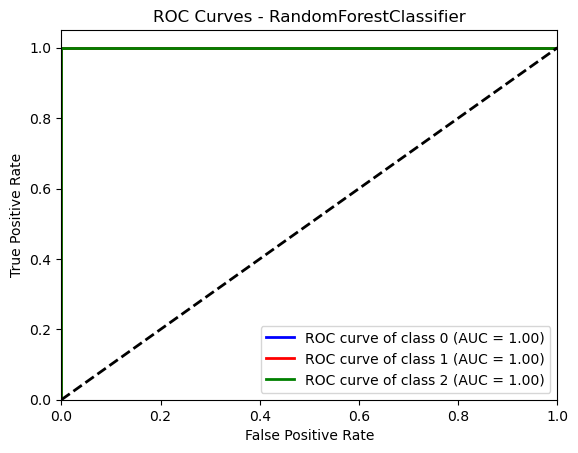

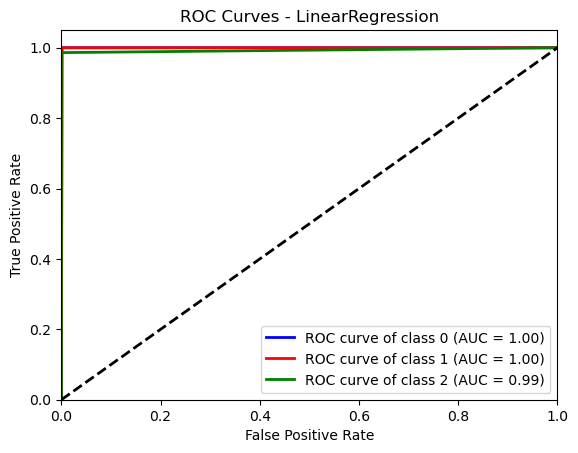

In [3]:
# Make predictions on the test data using the LinearRegression model
lr_pred_prob = lr.predict(test_data)

# Plot ROC curves for RandomForestClassifier
plt.figure()
plot_roc_curves(test_target_bin, rf_pred_prob, 'ROC Curves - RandomForestClassifier')
plt.show()

# Plot ROC curves for LinearRegression
plt.figure()
plot_roc_curves(test_target_bin, lr_pred_prob, 'ROC Curves - LinearRegression')
plt.show()



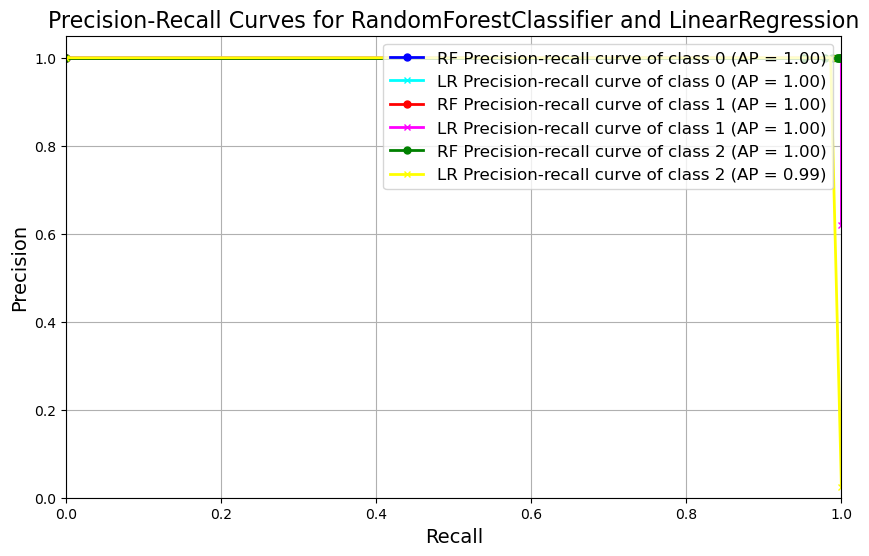

In [4]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curves_on_same_graph(y_test, y_rf_score, y_lr_score, n_classes=3):
    precision_rf = dict()
    recall_rf = dict()
    avg_precision_rf = dict()

    precision_lr = dict()
    recall_lr = dict()
    avg_precision_lr = dict()

    for i in range(n_classes):
        precision_rf[i], recall_rf[i], _ = precision_recall_curve(y_test[:, i], y_rf_score[:, i])
        avg_precision_rf[i] = average_precision_score(y_test[:, i], y_rf_score[:, i])

        precision_lr[i], recall_lr[i], _ = precision_recall_curve(y_test[:, i], y_lr_score[:, i])
        avg_precision_lr[i] = average_precision_score(y_test[:, i], y_lr_score[:, i])

    colors_rf = ['blue', 'red', 'green']
    colors_lr = ['cyan', 'magenta', 'yellow']
    marker_rf = 'o'
    marker_lr = 'x'

    plt.figure(figsize=(10, 6))
    for i, (color_rf, color_lr) in enumerate(zip(colors_rf, colors_lr)):
        plt.plot(recall_rf[i], precision_rf[i], color=color_rf, lw=2, marker=marker_rf, markersize=5,
                 label='RF Precision-recall curve of class {0} (AP = {1:0.2f})'.format(i, avg_precision_rf[i]))
        plt.plot(recall_lr[i], precision_lr[i], color=color_lr, lw=2, marker=marker_lr, markersize=5,
                 label='LR Precision-recall curve of class {0} (AP = {1:0.2f})'.format(i, avg_precision_lr[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curves for RandomForestClassifier and LinearRegression', fontsize=16)
    plt.legend(loc="upper right", fontsize=12)
    plt.grid(True)
    plt.show()

# Plot precision-recall curves for RandomForestClassifier and LinearRegression on the same graph
plot_precision_recall_curves_on_same_graph(test_target_bin, rf_pred_prob, lr_pred_prob)


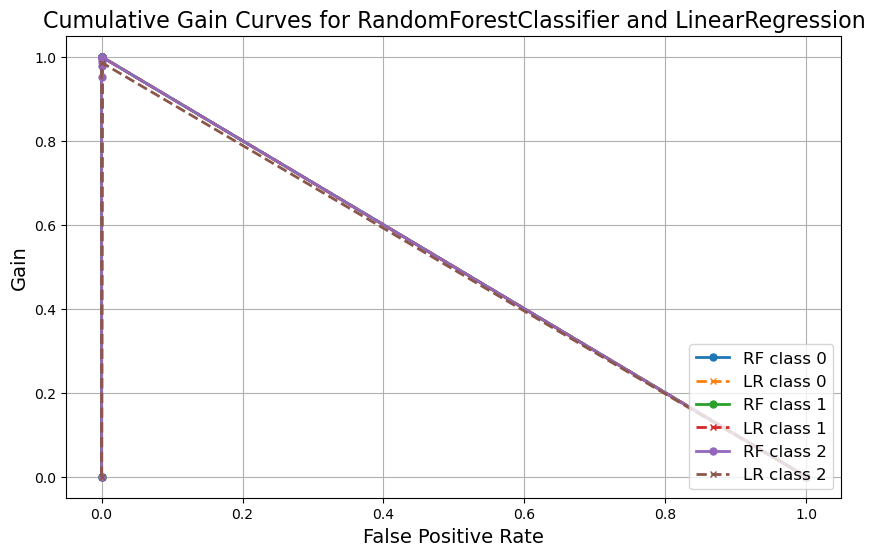

In [5]:
from sklearn.metrics import auc

def plot_cumulative_gain_curves_on_same_graph(y_test, y_rf_score, y_lr_score, n_classes=3):
    plt.figure(figsize=(10, 6))

    for i in range(n_classes):
        rf_class_scores = y_rf_score[:, i]
        lr_class_scores = y_lr_score[:, i]

        fpr_rf, tpr_rf, _ = roc_curve(y_test[:, i], rf_class_scores)
        fpr_lr, tpr_lr, _ = roc_curve(y_test[:, i], lr_class_scores)

        gains_rf = tpr_rf - fpr_rf
        gains_lr = tpr_lr - fpr_lr

        plt.plot(fpr_rf, gains_rf, lw=2, linestyle='-', marker='o', markersize=5, label=f'RF class {i}')
        plt.plot(fpr_lr, gains_lr, lw=2, linestyle='--', marker='x', markersize=5, label=f'LR class {i}')

    plt.title('Cumulative Gain Curves for RandomForestClassifier and LinearRegression', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('Gain', fontsize=14)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True)
    plt.show()

# Plot Cumulative Gain curves for RandomForestClassifier and LinearRegression on the same graph
plot_cumulative_gain_curves_on_same_graph(test_target_bin, rf_pred_prob, lr_pred_prob)
